<a href="https://colab.research.google.com/github/jeetu-g2-1/My_Projects/blob/main/12_PCA_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

 1️⃣ Load and Preprocess MNIST Dataset

    📌 The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9).
    📌 Each image is of size 28x28 (784 pixels in total).
    📌 We reshape it into vectors of shape (784,).

Load MNIST dataset

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Extract image data (70,000 samples, 784 features)
X = X / 255.0  # Normalize pixel values to [0,1]

Mean centering: Subtract the mean from each feature (Column-wise mean)

In [ ]:
mean_image = np.mean(X, axis=0)
X_centered = X - mean_image  # This ensures data has zero mean


 2️⃣ Compute Covariance Matrix

    📌 The covariance matrix captures the relationship between features (pixels).
    📌 Formula: Cov(X) = (1/N) * X^T * X, where X is mean-centered



In [ ]:
cov_matrix = np.cov(X_centered.T)  # Compute covariance matrix of shape (784, 784)

3️⃣ Calculate Eigen vector and eigen values

    📌 Eigenvalues & Eigenvectors are fundamental in PCA.
    📌 Eigenvectors (principal components) define new axes with maximum variance.
    📌 Eigenvalues indicate the amount of variance captured by each component.

    📌 Characterstics equation Formula:
    
    🔹 Cov(X) * v = λ * v
        Where:
        - v represents the eigenvectors (principal components)
        - λ represents the eigenvalues (variance captured by each component)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Compute EVD

Sort eigenvalues & eigenvectors in descending order

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

 4️⃣ Select Principal Components

    📌 We choose the top K eigenvectors (principal components).
    📌 These represent the most important features in the data.
    📌 We select enough components to retain 95% of variance.

In [ ]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # Find K where 95% variance is retained

print(f"Number of Principal Components to retain ≥95% variance: {n_components_95}")

top_eigenvectors = eigenvectors[:, :n_components_95]  # Select top K eigenvectors

Number of Principal Components to retain ≥95% variance: 154


 5️⃣ Transform Data into Principal Component Space

    📌 Project data onto the selected principal components
    📌 Formula: Z = X_centered * P, where P is the matrix of top eigenvectors.

In [ ]:
X_projected = np.dot(X_centered, top_eigenvectors)

6️⃣ Reconstruct Image Using Principal Components

    📌 Formula: X_reconstructed = Mean + Z * P^T
    📌 Adding back the mean is necessary as we initially centered the data.

In [ ]:
X_reconstructed = np.dot(X_projected, top_eigenvectors.T) + np.array(mean_image).reshape(1, -1)


7️⃣ Analyze Reconstruction Error

    📌 Reconstruction error (Mean Squared Error (MSE)) measures data loss.
    📌 As we add more components, error should decrease.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Ensure `X` is a NumPy array
X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
X_centered = X - np.mean(X, axis=0)

# Ensure mean_image is a NumPy array with correct shape
mean_image = np.mean(X, axis=0)
mean_image = np.array(mean_image).reshape(1, -1)

# Ensure eigenvectors is a NumPy array
eigenvectors = np.array(eigenvectors)

reconstruction_errors = []

for k in range(1, n_components_95 + 1):
    top_k_eigenvectors = eigenvectors[:, :k]  # Extract top-k eigenvectors
    X_projected_k = np.dot(X_centered, top_k_eigenvectors)  # Project onto k components

    # Ensure correct broadcasting by reshaping mean_image
    X_reconstructed_k = np.dot(X_projected_k, top_k_eigenvectors.T) + mean_image

    # Compute reconstruction error
     # Formula: Error = (1/N) * Sum (Original - Reconstructed)^2
    error = mean_squared_error(X, X_reconstructed_k)
    reconstruction_errors.append(error)

print("Reconstruction errors computed successfully.")


Reconstruction errors computed successfully.


In [ ]:
components_to_test = [1, 5, 10, 20, 50, n_components_95]  # Test with different numbers of components

reconstructed_images = {}

for k in components_to_test:
    top_k_eigenvectors = eigenvectors[:, :k]
    X_projected_k = np.dot(X_centered, top_k_eigenvectors)
    X_reconstructed_k = np.dot(X_projected_k, top_k_eigenvectors.T) + mean_image
    reconstructed_images[k] = X_reconstructed_k

Plot reconstruction error vs. number of components

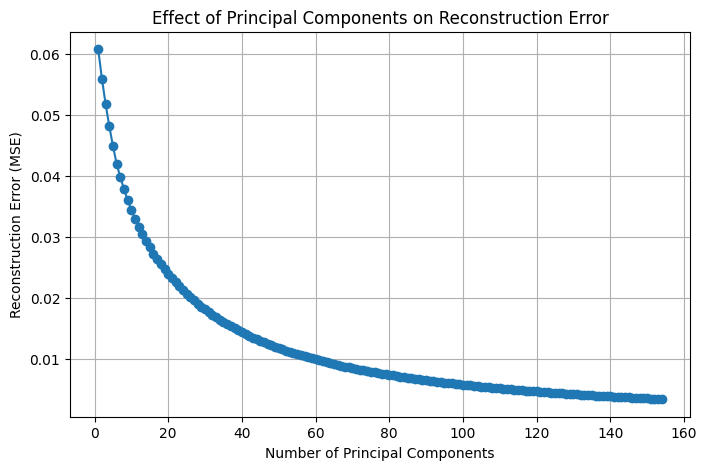

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components_95 + 1), reconstruction_errors, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Effect of Principal Components on Reconstruction Error')
plt.grid()
plt.show()

 8️⃣ Visualize Original vs. Reconstructed Image

    📌 We display an original MNIST image and its reconstruction using PCA.

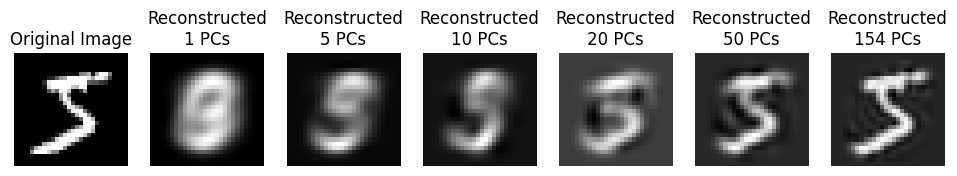

In [ ]:
def plot_images(original, reconstructed_images, components_list):
    """Function to plot original and reconstructed images."""
    fig, axes = plt.subplots(1, len(reconstructed_images) + 1, figsize=(12, 3))

    # Plot original image
    axes[0].imshow(original.reshape(28, 28), cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Plot reconstructed images with different numbers of principal components
    for i, k in enumerate(components_list):
        axes[i + 1].imshow(reconstructed_images[k][0].reshape(28, 28), cmap='gray')
        axes[i + 1].set_title(f"Reconstructed\n{k} PCs")
        axes[i + 1].axis("off")

    plt.show()

# Select a sample image (first image in dataset)
sample_image = X[0]

# Plot original vs reconstructed images
plot_images(sample_image, reconstructed_images, components_to_test)